In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%cd "datasets/olist_ecommerce"

C:\Users\Visagio\Downloads\Poli\data_science\notebooks\datasets\olist_ecommerce


In [3]:
customers_file_name = 'olist_customers_dataset.csv'
orders_file_name = 'olist_orders_dataset.csv'
geolocation_file_name = 'olist_geolocation_dataset.csv'
products_file_name = 'olist_products_dataset.csv'
order_items_file_name = 'olist_order_items_dataset.csv'
sellers_file_name = 'olist_sellers_dataset.csv'
order_payments_file_name = 'olist_order_payments_dataset.csv'
product_translation_file_name = 'product_category_name_translation.csv'
order_reviews_file_name = 'olist_order_reviews_dataset.csv'

In [4]:
df_customers = pd.read_csv(customers_file_name,sep=',')
df_orders = pd.read_csv(orders_file_name,sep=',')
df_geolocation = pd.read_csv(geolocation_file_name,sep=',')
df_products = pd.read_csv(products_file_name,sep=',')
df_order_items = pd.read_csv(order_items_file_name,sep=',')
df_sellers = pd.read_csv(sellers_file_name,sep=',')
df_order_payments = pd.read_csv(order_payments_file_name,sep=',')
df_order_reviews = pd.read_csv(order_reviews_file_name,sep=',')

In [5]:
df_customers.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


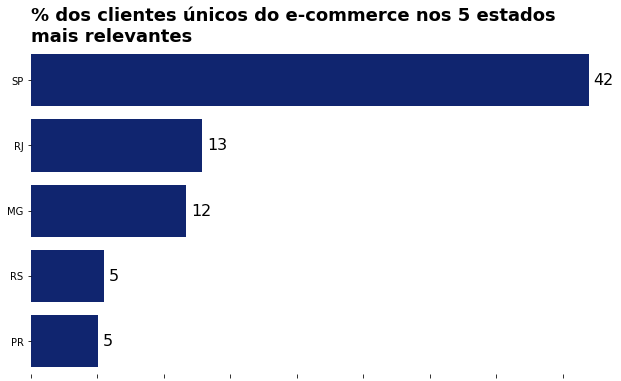

In [6]:
customer_states = df_customers.groupby('customer_state')
unique_customers_by_state = customer_states.customer_unique_id.nunique().sort_values(ascending=False).to_frame()

unique_customers_by_state['customer_state'] = unique_customers_by_state.index
unique_customers_by_state['perc_total_customers'] = unique_customers_by_state.customer_unique_id *(100 / df_customers.customer_unique_id.nunique())

f, ax = plt.subplots(figsize=(10,6))
sns.set_color_codes("dark")

splot = sns.barplot(x="perc_total_customers", y="customer_state", data=unique_customers_by_state.head(5), color="b")

# Add annotations of values
for p in ax.patches:
    ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", size = 16)

# Add a legend and informative axis label

ax.set(xlim=(0, max(unique_customers_by_state['perc_total_customers'])), 
       xlabel='', ylabel='', xticklabels=[])

ax.set_title("% dos clientes únicos do e-commerce nos 5 estados \nmais relevantes",
             size=18,fontweight="bold",loc = 'left')
ax.grid(False)
sns.despine(offset=10, trim=True, left=True, bottom=True);
plt.show()

In [7]:
df_customer_orders = pd.merge(
    pd.merge(df_customers, df_orders, how='inner', on="customer_id", validate="one_to_one"),
    pd.merge(df_order_payments, df_order_reviews, how='inner', on="order_id"),
    how='inner', on="order_id")

df_order_products = pd.merge(df_order_items,df_products,how='inner',on='product_id')

In [8]:
# Add number of order items and sum of items price per order

df_grouped_orders = df_order_products.groupby('order_id', as_index=False).agg(
    {'product_id' : ['count','nunique'], 'price' : 'sum'})
df_grouped_orders.columns = ['order_id', 'number_of_items','number_of_unique_items','sum_of_item_prices']

df_customer_orders = pd.merge(df_customer_orders,df_grouped_orders, how='inner', on='order_id')
df_customer_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,number_of_items,number_of_unique_items,sum_of_item_prices
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,1,1,124.99
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,1,1,289.00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,157.73,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,1,1,139.94
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,173.30,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,1,1,149.94
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,252.25,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,1,1,230.00


In [9]:
df_customer_orders.order_purchase_timestamp = pd.to_datetime(df_customer_orders.order_purchase_timestamp)

df_first_orders = df_customer_orders.groupby('customer_unique_id', as_index = False).agg(
                        {'order_purchase_timestamp':'min'})
df_first_orders.columns = ['customer_unique_id','first_purchase_timestamp']

df_customer_orders = pd.merge(df_customer_orders,df_first_orders,how='inner',on='customer_unique_id')

In [10]:
df_customer_orders['days_since_first_purchase'] = ((df_customer_orders['order_purchase_timestamp'].dt.date
                                                   - df_customer_orders['first_purchase_timestamp'].dt.date)/np.timedelta64(1,'D')).astype(int)

In [11]:
# Orders dataset in order to find last order previous than current order
df_customer_orders = df_customer_orders.sort_values(by=['customer_unique_id','order_purchase_timestamp'])
df_customer_orders.reset_index(drop=True, inplace=True)

In [24]:
df_customer_orders['last_purchase_timestamp'] = pd.to_datetime(np.nan)
for idx in df_customer_orders[df_customer_orders['last_purchase_timestamp'].notna()].index:
    df_customer_orders['last_purchase_timestamp'][idx] = df_customer_orders.loc[
        (df_customer_orders.customer_unique_id == df_customer_orders.customer_unique_id[30971]) &
        (df_customer_orders.order_purchase_timestamp < df_customer_orders.order_purchase_timestamp[30971])
    ].order_purchase_timestamp.max()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,number_of_items,number_of_unique_items,sum_of_item_prices,first_purchase_timestamp,days_since_first_purchase,last_purchase_timestamp
0,fadbb3709178fc513abc1b2670aa1ad2,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,e22acc9c116caa3f2b7121bbb380d08e,delivered,2018-05-10 10:56:27,2018-05-10 11:11:18,2018-05-12 08:18:00,...,Super Recomendo,"Adorei a cortina, ficou linda na minha sala, e...",2018-05-17 00:00:00,2018-05-21 13:44:48,1,1,129.90,2018-05-10 10:56:27,0,NaT
1,4cb282e167ae9234755102258dd52ee8,0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,3594e05a005ac4d06a72673270ef9ec9,delivered,2018-05-07 11:11:27,2018-05-07 18:25:44,2018-05-09 12:18:00,...,NaN,NaN,2018-05-11 00:00:00,2018-05-11 22:29:25,1,1,18.90,2018-05-07 11:11:27,0,NaT
2,9b3932a6253894a02c1df9d19004239f,0000f46a3911fa3c0805444483337064,88115,sao jose,SC,b33ec3b699337181488304f362a6b734,delivered,2017-03-10 21:05:03,2017-03-10 21:05:03,2017-03-13 12:58:30,...,NaN,NaN,2017-04-06 00:00:00,2017-04-07 01:19:44,1,1,69.00,2017-03-10 21:05:03,0,NaT
3,914991f0c02ef0843c0e7010c819d642,0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA,41272756ecddd9a9ed0180413cc22fb6,delivered,2017-10-12 20:29:41,2017-10-12 20:49:17,2017-10-13 20:08:19,...,NaN,Bom vendedor,2017-11-02 00:00:00,2017-11-03 00:17:51,1,1,25.99,2017-10-12 20:29:41,0,NaT
4,47227568b10f5f58a524a75507e6992c,0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP,d957021f1127559cd947b62533f484f7,delivered,2017-11-14 19:45:42,2017-11-14 20:06:52,2017-11-16 19:52:10,...,NaN,NaN,2017-11-28 00:00:00,2017-12-02 22:29:35,1,1,180.00,2017-11-14 19:45:42,0,NaT
5,4a913a170c26e3c8052ed0202849b5a8,0004bd2a26a76fe21f786e4fbd80607f,5036,sao paulo,SP,3e470077b690ea3e3d501cffb5e0c499,delivered,2018-04-05 19:33:16,2018-04-05 19:48:59,2018-04-07 00:38:52,...,NaN,NaN,2018-04-08 00:00:00,2018-04-10 20:13:32,1,1,154.00,2018-04-05 19:33:16,0,NaT
6,d2509c13692836fc0449e88cf9eb4858,00050ab1314c0e55a6ca13cf7181fecf,13084,campinas,SP,d0028facea13f508e880202d7097a5a1,delivered,2018-04-20 12:57:23,2018-04-25 03:51:13,2018-04-25 15:25:00,...,NaN,NaN,2018-04-28 00:00:00,2018-05-01 20:41:51,1,1,27.99,2018-04-20 12:57:23,0,NaT
7,a81ebb9b32f102298c0c89635b4b3154,00053a61a98854899e70ed204dd4bafe,80410,curitiba,PR,44e608f2db00c74a1fe329de44416a4e,delivered,2018-02-28 11:15:41,2018-02-28 11:32:42,2018-03-01 20:09:30,...,NaN,Olá! Comprei dois potes de whey e chegou apena...,2018-03-17 00:00:00,2018-03-17 23:22:53,2,2,382.00,2018-02-28 11:15:41,0,NaT
8,3b37fb626fdf46cd99d37ec62afa88ff,0005e1862207bf6ccc02e4228effd9a0,25966,teresopolis,RJ,ae76bef74b97bcb0b3e355e60d9a6f9c,delivered,2017-03-04 23:32:12,2017-03-04 23:43:26,2017-03-06 05:14:07,...,NaN,NaN,2017-03-10 00:00:00,2017-03-16 03:45:59,1,1,135.00,2017-03-04 23:32:12,0,NaT
9,c59e8ff99836e90d8b457d4122dc34e9,0005ef4cd20d2893f0d9fbd94d3c0d97,65060,sao luis,MA,01b330808c5819a6a3cb79b72f0b8288,delivered,2018-03-12 15:22:12,2018-03-12 15:38:46,2018-03-13 16:07:27,...,NaN,Até o presente momento não recebi o produto e ...,2018-04-06 00:00:00,2018-04-06 20:54:22,1,1,104.90,2018-03-12 15:22:12,0,NaT
